## Reaction Bench Lesson 2

In this tutorial we will be attempting to get a high reward from the simulated reaction: `2 3-chlorohexane + 2 Na --> 4,5-diethyloctane + 2 NaCl.` The corresponding lesson can be found in the `lesson_2_reaction.md` file.

We will start by importing the usual modules needed. The loading and initialization of this environment is similar to the one in lesson 1.

In [1]:
# import all the required external modules
import gym
import numpy as np
import os
import pickle
import sys
from time import sleep
from gym import envs
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# ensure all necessary modules can be found
sys.path.append("../") # to access chemistrylab
sys.path.append("../chemistrylab/reactions") # to access all reactions

# import all local modules
import chemistrylab

This will show all the environments we can currently run. Eventually you can create your own environments with different reactions and target material using the reaction template.

In [2]:
# show all environments for reaction bench
all_envs = envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs if 'React' in env_spec.id]
print(env_ids)

['WurtzReact-v0', 'WurtzReact_overlap-v0']


This explains the simulated reaction we are trying to simulate and is initializing the reaction environment.

In [4]:
# trying to get high reward for wurtz reaction of form:
# A-X + A-X --> A-A + X-X and A-X + B-X --> A-B + X-X
# Rewards comes from producing A-A or B-B
# Cannot come from A-B as this doesn't make the desired property
# Desired material in this case is initialized to be 4,5-diethyloctane
# initializes environment
env = gym.make("WurtzReact_overlap-v0")
render_mode = "human"

In [5]:
done = False
__ = env.reset()

# shows # of actions available
print('# of actions available: ',env.action_space.shape[0])
num_actions_available = env.action_space.shape[0]

total_steps=0
total_reward=0

# of actions available:  6


We will store certain values in these arrays so can plot them later on to visually show how each variable changes over time.

In [6]:
reward_over_time=[]
steps_over_time=[]
reactant_1 = []
reactant_2 = []
total_reward_over_time = []

action = np.ones(env.action_space.shape)

Below are the 2 different action sets that we can perform. Notice that one is labeled "adding reactants not needed." If we uncomment this set of actions we will notice that we will get a lower rewards. **The reason this occurs is thoroughly explained in the markdown lesson!**

-----------------------------------------
total_steps:  0
reward: 0.00 
total reward: 0.00


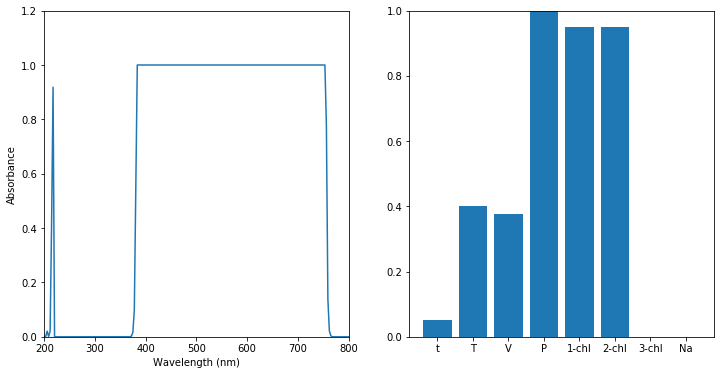

0.0
0.081620686
[5.0000001e-02 4.0000001e-01 3.7500000e-01 1.6763217e+04 0.0000000e+00
 0.0000000e+00 0.0000000e+00 8.1620686e-02 1.0365457e-03 1.0365457e-03
 2.0730916e-02 1.0365457e-03 2.0730916e-02 4.1461825e-01 9.1837937e-01
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 5.0486127e-25 2.3317553e-23 9.6260508e-22 3.5520315e-20 1.1715478e-18
 3.4539059e-17 9.1014696e-16 2.1437567e-14 4.5133035e-13 8.4933649e-12
 1.4286200e-10 2.1479176e-09 2.8865061e-08 3.4672959e-07 3.7227485e-06
 3.5727255e-05 3.0647169e-04 2.3498568e-03 1.6104823e-02 9.86

-----------------------------------------
total_steps:  3
reward: 0.00 
total reward: 0.01
0.0
0.048007157
[2.0000000e-01 1.0000000e+00 7.5000000e-01 1.5139548e+04 0.0000000e+00
 0.0000000e+00 0.0000000e+00 4.8007157e-02 6.6388012e-03 6.6388012e-03
 2.0730916e-02 6.6388012e-03 2.0730916e-02 4.1461825e-01 9.5199281e-01
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 3.2708730e-25 1.5106874e-23 6.2364834e-22 2.3012745e-20 7.5901721e-19
 2.2377012e-17 5.8966204e-16 1.3888876e-14 2.9240594e-13 5.5026439e-12
 9.2556803e-11 1.3915834e-09 1.8700968e-0

-----------------------------------------
total_steps:  6
reward: 0.01 
total reward: 0.03
0.0
0.023254653
[3.4999999e-01 1.0000000e+00 1.0000000e+00 1.2213195e+04 0.0000000e+00
 0.0000000e+00 0.0000000e+00 2.3254653e-02 1.0764219e-02 1.0764219e-02
 2.0730916e-02 1.0764219e-02 2.0730916e-02 4.1461825e-01 9.7674537e-01
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.6847343e-25 1.2399730e-23 5.1189091e-22 1.8888874e-20 6.2300173e-19
 1.8367064e-17 4.8399489e-16 1.1399998e-14 2.4000693e-13 4.5165733e-12
 7.5970674e-11 1.1422124e-09 1.5349766e-0

-----------------------------------------
total_steps:  9
reward: 0.01 
total reward: 0.06
0.0
0.00676312
[5.00000000e-01 1.00000000e+00 1.00000000e+00 1.22808564e+04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.76312018e-03
 1.35128088e-02 1.35128088e-02 2.07309164e-02 1.35128088e-02
 2.07309164e-02 4.14618254e-01 9.93236780e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.73006369e-25 1.26090896e-23
 5.20533743e-22 1.92077962e-20 6.33520622e-19 1.86771774e-17
 4.92166747e-16 1.15924768e-14 2.4405927

-----------------------------------------
total_steps:  12
reward: 0.01 
total reward: 0.08
0.0
0.0
[6.49999976e-01 1.00000000e+00 1.00000000e+00 1.25065771e+04
 1.20621677e-02 1.20621677e-02 0.00000000e+00 0.00000000e+00
 1.46401422e-02 1.46401422e-02 2.07309164e-02 1.46401422e-02
 2.07309164e-02 4.14618254e-01 1.00000119e+00 4.31078092e-07
 3.80307324e-06 2.99896219e-05 2.11381703e-04 1.33174623e-03
 7.49955606e-03 3.77491713e-02 1.69839680e-01 6.83012784e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 

-----------------------------------------
total_steps:  16
reward: 0.01 
total reward: 0.12
0.0
0.0
[8.5000002e-01 1.0000000e+00 1.0000000e+00 1.4069307e+04 1.0728394e-01
 1.0728394e-01 0.0000000e+00 0.0000000e+00 1.4640142e-02 1.4640142e-02
 2.0730916e-02 1.4640142e-02 2.0730916e-02 4.1461825e-01 1.0000012e+00
 3.8341168e-06 3.3825487e-05 2.6673521e-04 1.8800820e-03 1.1844886e-02
 6.6702932e-02 3.3575061e-01 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.000

-----------------------------------------
total_steps:  19
reward: 0.01 
total reward: 0.14
0.0
0.0
[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.50480029e+04
 1.66918814e-01 1.66918814e-01 0.00000000e+00 0.00000000e+00
 1.46401422e-02 1.46401422e-02 2.07309164e-02 1.46401422e-02
 2.07309164e-02 4.14618254e-01 1.00000119e+00 5.96534892e-06
 5.26277254e-05 4.15002694e-04 2.92514428e-03 1.84289850e-02
 1.03780426e-01 5.22380948e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 

In [7]:
while not done:
    # Actions:
    #   a[0] changes the temperature between -dT (a[0] = 0.0) and +dT (a[0] = 1.0)
    #   a[1] changes the Volume between -dV (a[1] = 0.0) and +dV (a[1] = 1.0)
    #   a[2:] adds between none (a[2:] = 0.0) and all (a[2:] = 1.0) of each reactant
    if total_steps  < 20:
        action[0] = 1
        action[1] = 1
        action[2] = 0.05 # 1-chlorohexane
        action[3] = 0.05 # 2-chlorohexane
        action[4] = 1    # 3-chlorohexane
        action[5] = 1    # Na

        '''
        # Adding Reactants not needed:
        action[0] = 1
        action[1] = 1
        action[5] = 1
        action[4] = 1
        action[2] = 1
        action[3] = 1
        '''

    # perform the action and update the reward
    state, reward, done, __ = env.step(action)
    print('-----------------------------------------')
    print('total_steps: ', total_steps)
    print('reward: %.2f ' % reward)
    total_reward += reward
    print('total reward: %.2f' % total_reward)
    # print(state)

    # render the plot
    env.render(mode=render_mode)
    # sleep(2)

    # increment one step
    total_steps += 1

    print(env.state[6])
    print(env.state[7])
    print(state)

    # append arrays for states over time
    reward_over_time.append(reward)
    total_reward_over_time.append(total_reward)
    steps_over_time.append(total_steps)
    reactant_1.append(env.state[6])
    reactant_2.append(env.state[7])

This simply shows us the stats of the reaction vessel. It essentially shows everything from thermodynamic variables, to the amount of materia

In [8]:
# ask user if they want to see stats of reaction vessel
show_stats = input("Show Reaction Vessel Stats ('Y'/'N') >>> ")

if show_stats.lower() in ["y", "yes"]:
    # open and check the material dict
    vessel_path = os.path.join(os.getcwd(), "vessel_experiment_0.pickle")
    with open(vessel_path, 'rb') as open_file:
        v = pickle.load(open_file)

    print("")
    print("---------- VESSEL ----------")
    print("Label: {}".format(v.label))

    print("")
    print("---------- THERMODYNAMIC VARIABLES ----------")
    print("Temperature (in K): {:e}".format(v.temperature))
    print("Volume (in L): {:e}".format(v.volume))
    print("Pressure (in kPa): {:e}".format(v.pressure))

    print("")
    print("---------- MATERIAL_DICT ----------")
    for material, value_list in v._material_dict.items():
        print("{} : {}".format(material, value_list))

    print("")
    print("---------- SOLUTE_DICT ----------")
    for solute, value_list in v._solute_dict.items():
        print("{} : {}".format(solute, value_list))

Show Reaction Vessel Stats ('Y'/'N') >>> y

---------- VESSEL ----------
Label: new

---------- THERMODYNAMIC VARIABLES ----------
Temperature (in K): 1.000000e+00
Volume (in L): 1.197500e-06
Pressure (in kPa): 8.192200e-07

---------- MATERIAL_DICT ----------
1-chlorohexane : [<class 'chemistrylab.chem_algorithms.material.OneChlorohexane'>, 0.2768946]
2-chlorohexane : [<class 'chemistrylab.chem_algorithms.material.TwoChlorohexane'>, 0.0]
3-chlorohexane : [<class 'chemistrylab.chem_algorithms.material.ThreeChlorohexane'>, 0.0]
Na : [<class 'chemistrylab.chem_algorithms.material.Na'>, 0.2768946]
dodecane : [<class 'chemistrylab.chem_algorithms.material.Dodecane'>, 0.36155286]
5-methylundecane : [<class 'chemistrylab.chem_algorithms.material.FiveMethylundecane'>, 0.0]
4-ethyldecane : [<class 'chemistrylab.chem_algorithms.material.FourEthyldecane'>, 0.0]
5,6-dimethyldecane : [<class 'chemistrylab.chem_algorithms.material.FiveSixDimethyldecane'>, 0.0]
4-ethyl-5-methylnonane : [<class 'chem

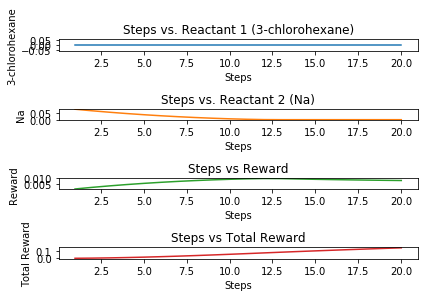

In [9]:

# graph states over time
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.plot(steps_over_time, reactant_1)
ax1.set_title('Steps vs. Reactant 1 (3-chlorohexane)')
ax1.set_xlabel('Steps')
ax1.set_ylabel('3-chlorohexane')

ax2.plot(steps_over_time, reactant_2, 'tab:orange')
ax2.set_title('Steps vs. Reactant 2 (Na)')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Na')

ax3.plot(steps_over_time, reward_over_time, 'tab:green')
ax3.set_title('Steps vs Reward')
ax3.set_xlabel('Steps')
ax3.set_ylabel('Reward')

ax4.plot(steps_over_time, total_reward_over_time, 'tab:red')
ax4.set_title('Steps vs Total Reward')
ax4.set_xlabel('Steps')
ax4.set_ylabel('Total Reward')

fig.tight_layout()
plt.savefig('Final Subplots Demo Lesson 3.png')
plt.show()